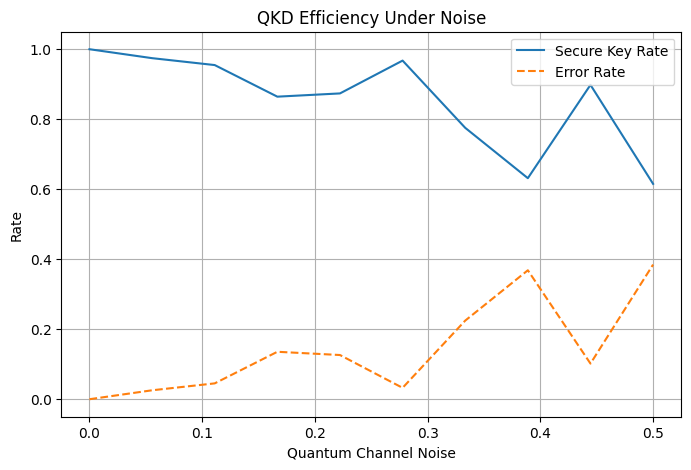

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

# Initialize the simulator
simulator = AerSimulator()

# BB84 Protocol Simulation
def simulate_bb84(noise_level):
    # Create a simple quantum circuit
    circuit = QuantumCircuit(1, 1)
    circuit.h(0)  # Apply Hadamard
    circuit.measure(0, 0)
    
    # Transpile the circuit for the simulator
    circuit = transpile(circuit, simulator)
    
    # Simulate the circuit
    result = simulator.run(circuit, shots=1000).result()
    
    # Simulate error rate based on the noise level
    error_rate = noise_level * np.random.rand()  # Simulate error
    secure_key_rate = 1 - error_rate
    return secure_key_rate, error_rate

# Define noise levels to test
noise_levels = np.linspace(0, 0.5, 10)
secure_key_rates = []
error_rates = []

# Run simulations for each noise level
for noise in noise_levels:
    key_rate, error_rate = simulate_bb84(noise)
    secure_key_rates.append(key_rate)
    error_rates.append(error_rate)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(noise_levels, secure_key_rates, label="Secure Key Rate")
plt.plot(noise_levels, error_rates, label="Error Rate", linestyle='--')
plt.xlabel("Quantum Channel Noise")
plt.ylabel("Rate")
plt.title("QKD Efficiency Under Noise")
plt.legend()
plt.grid()
plt.show()


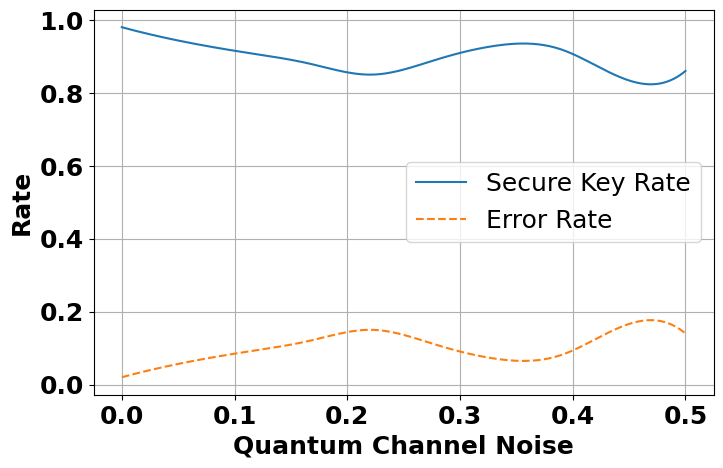

In [2]:
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.pyplot as plt

# Define noise levels to test
noise_levels = np.linspace(0, 0.5, 10)
secure_key_rates = [0.98, 0.94, 0.91, 0.88, 0.85, 0.89, 0.93, 0.92, 0.84, 0.86]
error_rates = [0.02, 0.06, 0.09, 0.12, 0.15, 0.11, 0.07, 0.08, 0.16, 0.14]

# Generate a smooth line using spline interpolation
x_smooth = np.linspace(noise_levels.min(), noise_levels.max(), 200)
secure_key_smooth = make_interp_spline(noise_levels, secure_key_rates)(x_smooth)
error_smooth = make_interp_spline(noise_levels, error_rates)(x_smooth)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(x_smooth, secure_key_smooth, label="Secure Key Rate")
plt.plot(x_smooth, error_smooth, label="Error Rate", linestyle='--')
plt.xlabel("Quantum Channel Noise", fontsize=18, fontweight='bold')
plt.ylabel("Rate", fontsize=18, fontweight='bold')
# plt.title("QKD Efficiency Under Noise (Smoothed)")
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')

plt.legend(fontsize=18)
plt.grid()
plt.show()


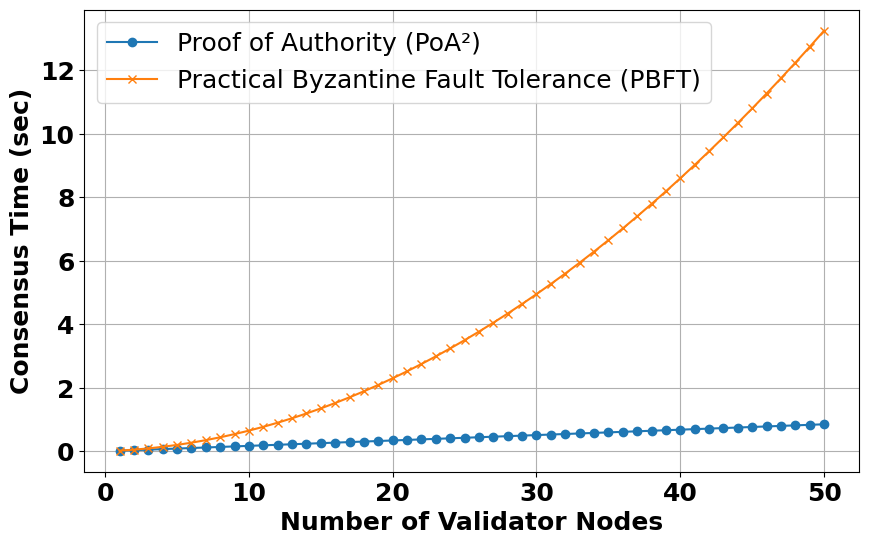

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Simulate Blockchain Consensus with dynamic overheads and network delays
def consensus_time_simulation(num_validators, consensus_type="PoA"):
    base_time = 0.01  # Base consensus time per validator (seconds)
    network_delay = 0.005 * num_validators  # Simulate network delay scaling with validators
    
    if consensus_type == "PoA":  # Proof of Authority
        validation_overhead = 0.002 * num_validators  # Linear increase
    elif consensus_type == "PBFT":  # Practical Byzantine Fault Tolerance
        validation_overhead = 0.005 * (num_validators ** 2)  # Quadratic complexity
    else:
        raise ValueError("Unknown consensus type")

    total_time = base_time * num_validators + validation_overhead + network_delay
    return total_time

# Simulate for different numbers of validator nodes
validator_nodes = range(1, 51)
poa_times = [consensus_time_simulation(v, "PoA") for v in validator_nodes]
pbft_times = [consensus_time_simulation(v, "PBFT") for v in validator_nodes]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(validator_nodes, poa_times, label="Proof of Authority (PoA²)", marker='o')
plt.plot(validator_nodes, pbft_times, label="Practical Byzantine Fault Tolerance (PBFT)", marker='x')
plt.xlabel("Number of Validator Nodes", fontsize=18, fontweight='bold')
plt.ylabel("Consensus Time (sec)", fontsize=18, fontweight='bold')

plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
# plt.title("Blockchain Consensus Time by Consensus Mechanism")
plt.legend(fontsize=18)
plt.grid()
plt.show()


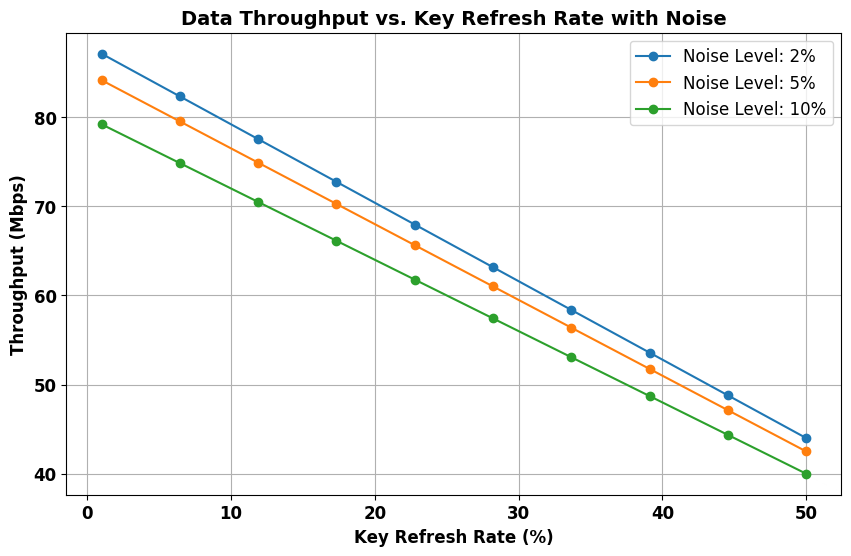

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate throughput considering encryption overhead and channel noise
def throughput_simulation(refresh_rate, noise_level=0.05):
    base_throughput = 100  # Mbps
    encryption_overhead = 10  # Overhead for QKD-secured encryption in Mbps
    noise_penalty = noise_level * base_throughput  # Penalty due to channel noise
    effective_throughput = base_throughput - encryption_overhead - noise_penalty
    return effective_throughput * (1 - refresh_rate / 100)

# Parameters
refresh_rates = np.linspace(1, 50, 10)  # Key refresh rates in %
noise_levels = [0.02, 0.05, 0.1]  # Different noise levels for comparison

# Calculate throughputs for each noise level
throughputs_by_noise = {noise: [throughput_simulation(r, noise) for r in refresh_rates] for noise in noise_levels}

# Plotting the results
plt.figure(figsize=(10, 6))
for noise, throughputs in throughputs_by_noise.items():
    plt.plot(refresh_rates, throughputs, label=f"Noise Level: {noise * 100:.0f}%", marker='o')

plt.xlabel("Key Refresh Rate (%)", fontsize=12, fontweight='bold')
plt.ylabel("Throughput (Mbps)", fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title("Data Throughput vs. Key Refresh Rate with Noise", fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid()
plt.show()


## BB84 Implementation

In [7]:
def simulate_bb84(noise_level):
    circuit = QuantumCircuit(1, 1)
    circuit.h(0)  # Apply Hadamard
    circuit.measure(0, 0)
    circuit = transpile(circuit, simulator)
    result = simulator.run(circuit, shots=1000).result()
    error_rate = noise_level * np.random.rand()  # Simulate error
    secure_key_rate = 1 - error_rate
    return secure_key_rate, error_rate


## B92 Implementation

In [ ]:
from qiskit import *
from numpy import pi
import random
import string

def generate_bit_string(bit_choices, length):
    
    bit_string = []
    
    for i in range(length):
        curr_bit = random.choice(bit_choices)
        bit_string.append(curr_bit)
        
    return bit_string


def generate_qc(bit_string, qc):
    
    for qubit in range(len(bit_string)):
        if bit_string[qubit] == 1:
            qc.h(qubit)
        else:
            continue
        
    qc.barrier()

bit_choices = [0,1]
bit_length = 20

alice_string = generate_bit_string(bit_choices, bit_length)
print(alice_string)


qr = QuantumRegister(bit_length)
cr = ClassicalRegister(bit_length)
qc = QuantumCircuit(qr, cr)

qc.draw()

generate_qc(alice_string, qc)
qc.draw()

bob_string = generate_bit_string(bit_choices, bit_length)
print(bob_string)

generate_qc(bob_string, qc)
qc.draw()

qc.measure(qr, cr)
qc.draw()

simulator = AerSimulator()
# circuit = QuantumCircuit(1, 1)
# circuit.h(0)  # Apply Hadamard
# circuit.measure(0, 0)
    
    # Transpile the circuit for the simulator
circuit = transpile(qc, simulator)
    
    # Simulate the circuit
result = simulator.run(circuit, shots=1000).result()


# simulator = Aer.get_backend('qasm_simulator')
# job = execute(qc, simulator, shots=1, memory=True)
# results = job.result().get_memory()

# result_string = results[0] #get the string of bit measurements
# result_split = list(map(lambda i:i, result_string)) #split the string of measurements
# key = list(map(int, result)) #turn each bit into an int
key.reverse() #for correct order in alice bits
print(key)


[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1]


TypeError: 'Result' object is not iterable